In [341]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

In [333]:
def make_separatable(n=2,line=[1,1,2,-5], tres = 1):

    dataset = np.empty([1,n+2])

    line = np.array(line)

    for i in range(200):
        point = np.append(10*np.random.normal(size=(1,n)),1)

        if (np.dot(line.T, point)) > tres: 
            dataset = np.vstack((dataset, np.append(point, 1)))
        if (np.dot(line.T, point)) < -tres: dataset = np.vstack((dataset, np.append(point, 0)))

    class_one = dataset[dataset[:,n+1]==0][:,0:n+1]
    class_two = dataset[dataset[:,n+1]==1][:,0:n+1]
    return dataset[:,0:n+1], dataset[:,n+1]

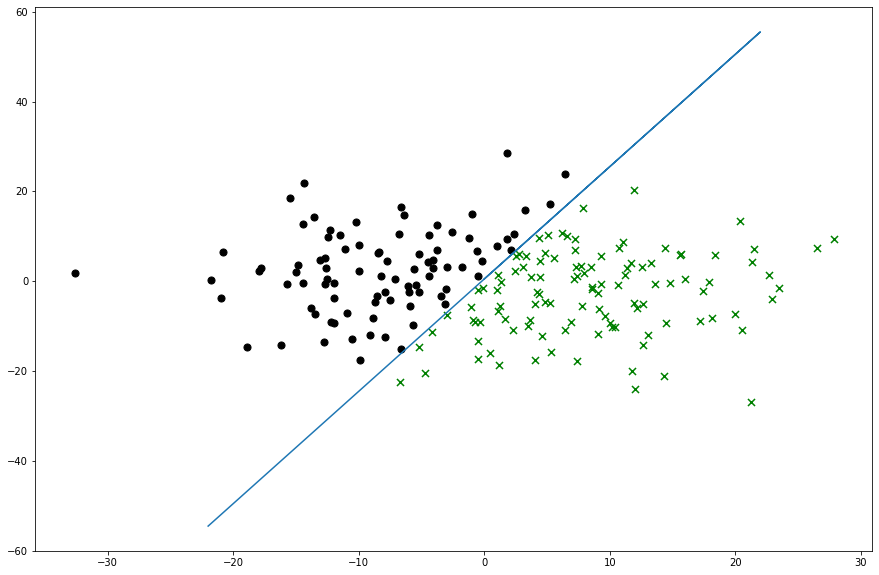

In [334]:
line = np.array([2,-5,-1])

data, target = make_separatable(n=2,line=line)

def line_points(line, m, n):
    x = np.append(np.arange(m/4), -np.arange(m/4))
    y = -(x*line[1:n]+line[n])/line[0]
    return x, y

def plot(line, data, target, n):
    fig = plt.figure(figsize = (15,10))

    x,y = line_points(line, data[:,1].max(), n)
    plt.scatter(data[target==0][:,1],data[target==0][:,0], marker='x', s=50, c='g')
    plt.scatter(data[target==1][:,1],data[target==1][:,0], marker='o', s=50, c='k')
    plt.plot(x,y)
    plt.show()
    
plot(line, data, target, 2)

In [417]:
class rosenBlatt:
    def __init__(self, n, true_line, iters=800, alpha=0.01):
        self.alpha= alpha
        self.iters = iters
        self.n = n
        self.line = np.append(np.random.normal(size=(1,n)),1)
        self.true_line = true_line

    def predict(self, line, point, label):
        return np.dot(self.line.T, point)
        
    
    def fit(self,data, target):
        iters = 0
        
        while True:
            idx = np.random.randint(0, target.shape[0], 1)
            point = data[idx][0]
            label = target[idx]
            e = self.predict(self.line, point, label)
            
            if e >= 0 and label ==1: 
                continue
        
            if e <= 0 and label ==0:
                continue
   

            if e != 0 : self.line[:self.n] += self.alpha*point[:self.n]
            iters+=1
            
            if iters % 20 == 0:
                print(f'True line:{self.true_line}, Estimated line: {self.line}')
                print('shifting point:', idx, data[idx])
                self.plot(self.line, data, target)
            
            if iters == self.iters:
                return self.line 
        
        
    def plot(self, line, data, target):
        fig = plt.figure(figsize = (15,10))

        x,y = line_points(line, data[:,1].max(), n)
        plt.scatter(data[target==0][:,1],data[target==0][:,0], marker='x', s=50, c='g')
        plt.scatter(data[target==1][:,1],data[target==1][:,0], marker='o', s=50, c='k')
        plt.plot(x,y)
        plt.show()

In [418]:
percept = rosenBlatt(2, line)

True line:[ 2 -5 -1], Estimated line: [-0.30742317  2.23055334  1.        ]
shifting point: [3] [[-2.24405195 17.46442403  1.        ]]


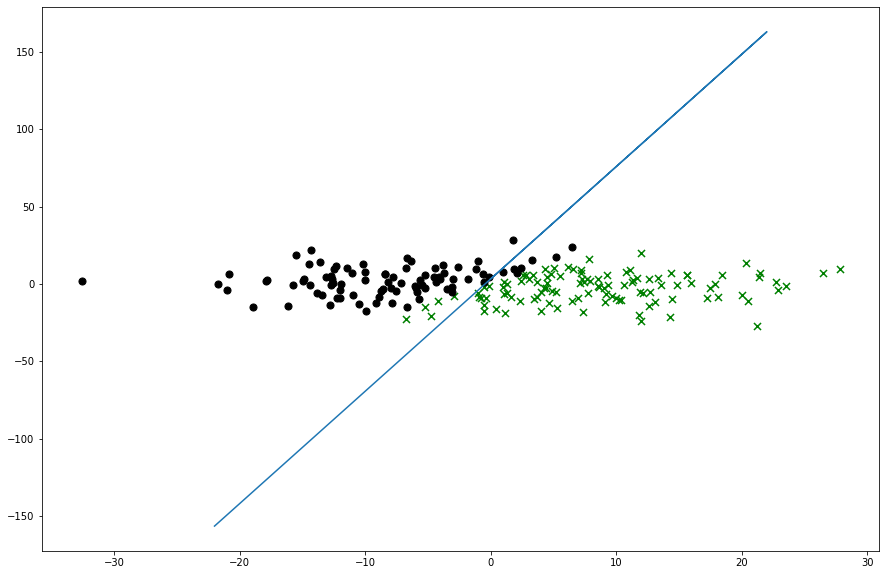

True line:[ 2 -5 -1], Estimated line: [-0.05445097  2.9297924   1.        ]
shifting point: [90] [[-0.67487663  9.34112026  1.        ]]


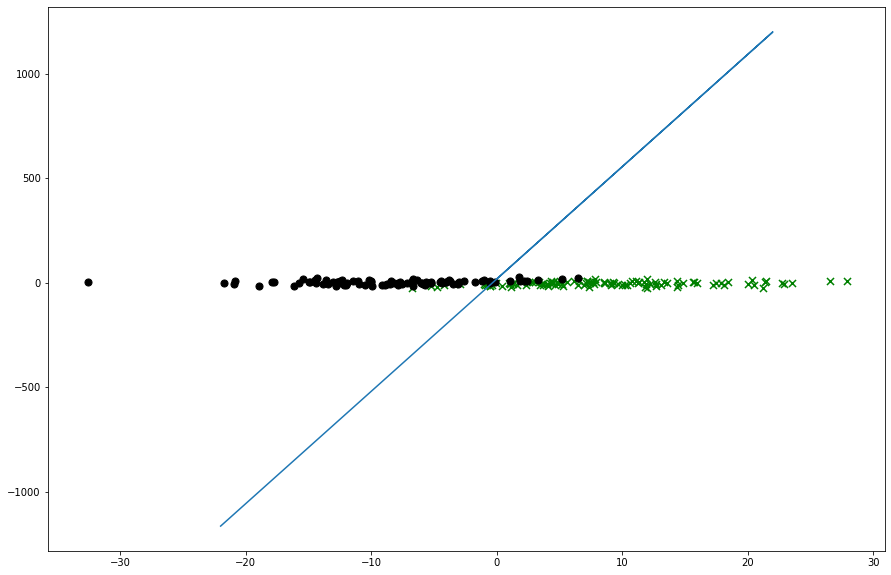

True line:[ 2 -5 -1], Estimated line: [-0.33463115  3.58628096  1.        ]
shifting point: [121] [[16.38526201  7.8431768   1.        ]]


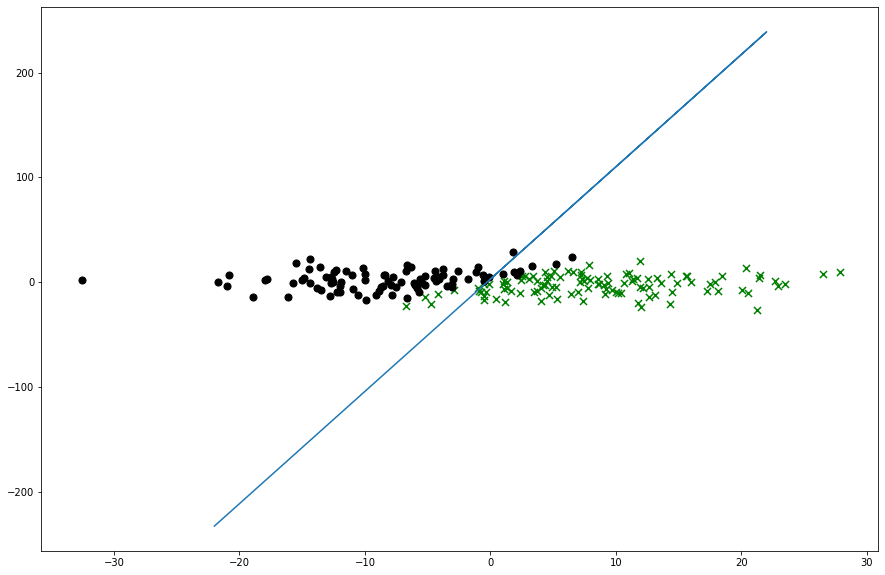

True line:[ 2 -5 -1], Estimated line: [0.16375558 4.07383847 1.        ]
shifting point: [53] [[1.86317078 7.94741192 1.        ]]


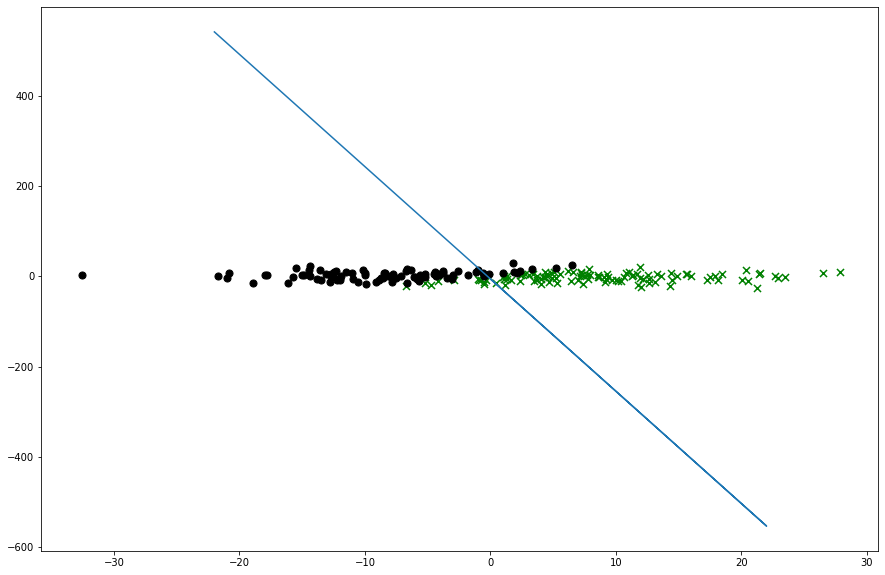

True line:[ 2 -5 -1], Estimated line: [-0.09029573  4.8668094   1.        ]
shifting point: [141] [[-1.3421912   8.54975728  1.        ]]


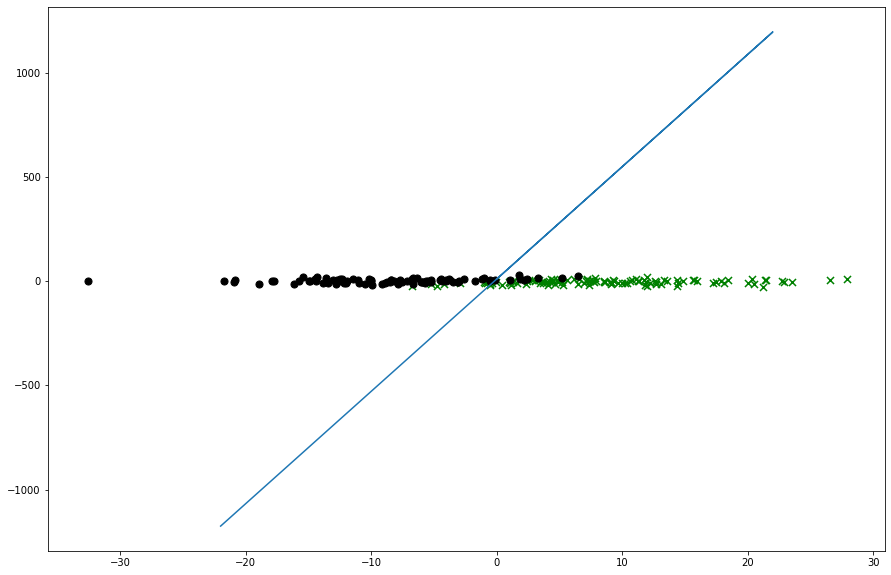

True line:[ 2 -5 -1], Estimated line: [-0.23513982  4.75242247  1.        ]
shifting point: [86] [[  1.76740878 -32.58756423   1.        ]]


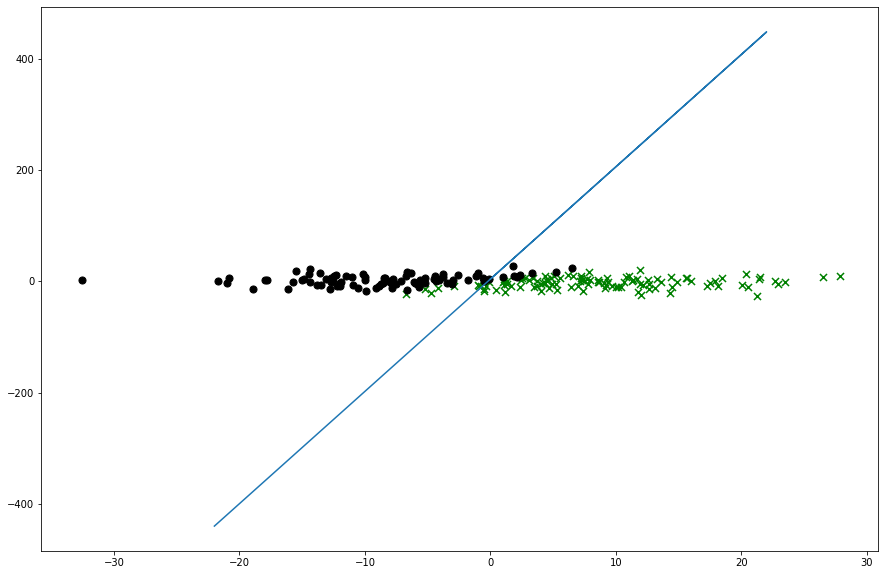

True line:[ 2 -5 -1], Estimated line: [-0.35671137  4.74114438  1.        ]
shifting point: [173] [[ 4.8156078  -4.07535337  1.        ]]


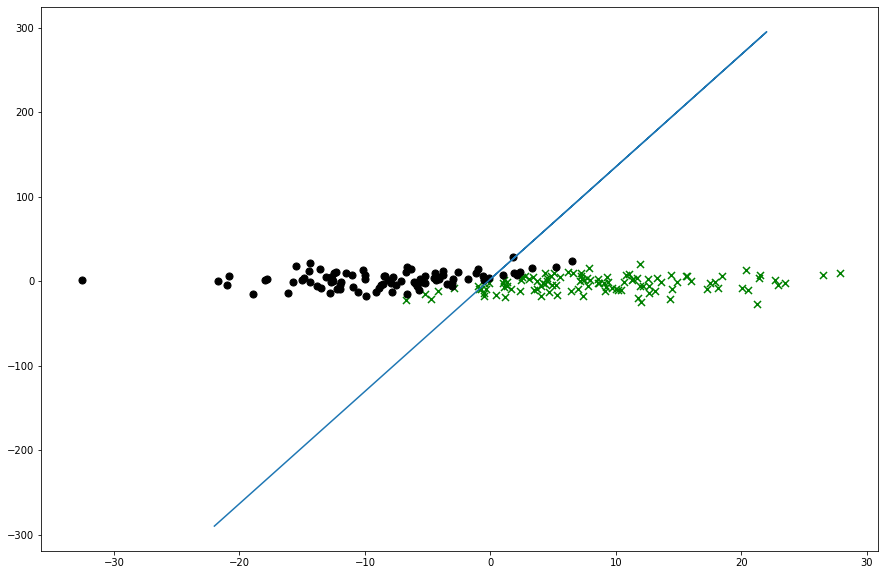

True line:[ 2 -5 -1], Estimated line: [-0.79030397  4.27987088  1.        ]
shifting point: [64] [[-26.87160653  21.23911529   1.        ]]


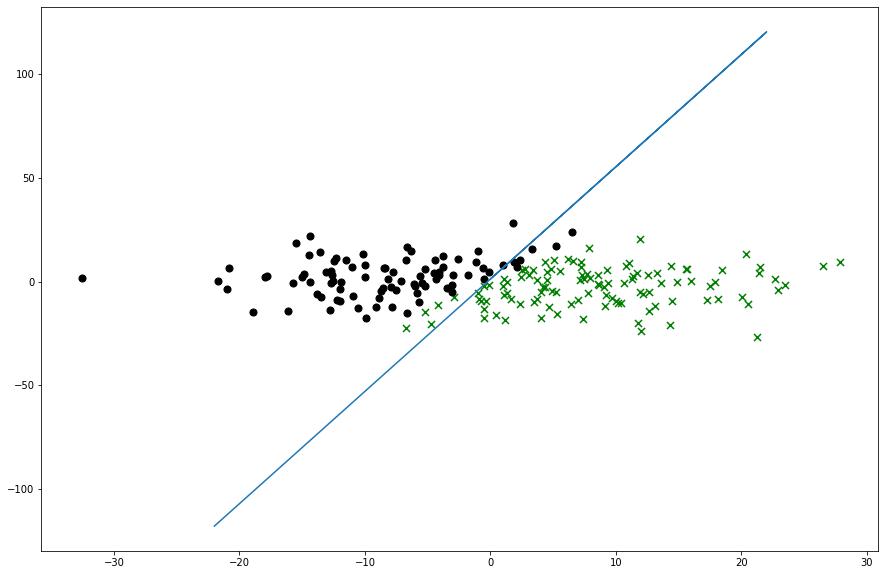

True line:[ 2 -5 -1], Estimated line: [-0.76011774  5.27309495  1.        ]
shifting point: [36] [[-4.93363551 11.92975051  1.        ]]


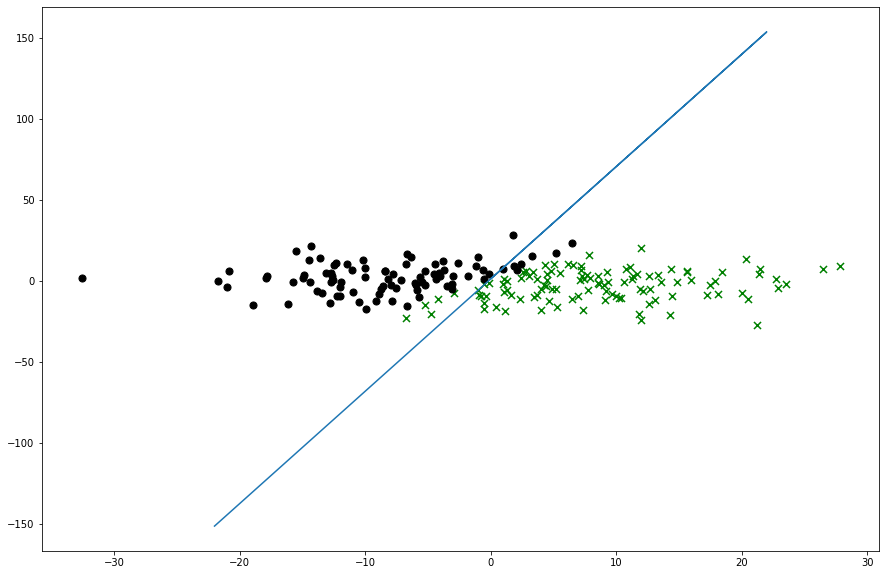

True line:[ 2 -5 -1], Estimated line: [-1.12764558  5.54435341  1.        ]
shifting point: [167] [[ 8.83794636 11.06687815  1.        ]]


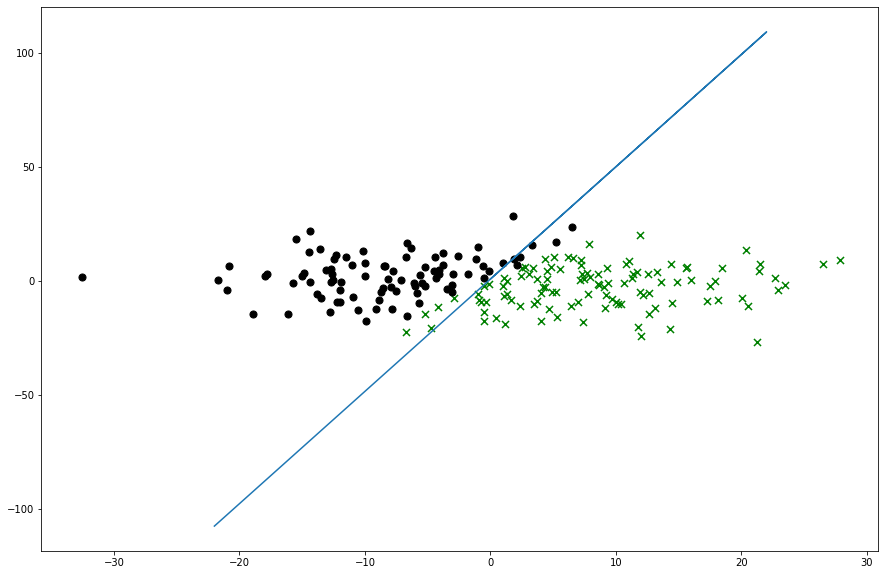

True line:[ 2 -5 -1], Estimated line: [-2.6222344   5.47990886  1.        ]
shifting point: [49] [[  2.99952292 -12.6444644    1.        ]]


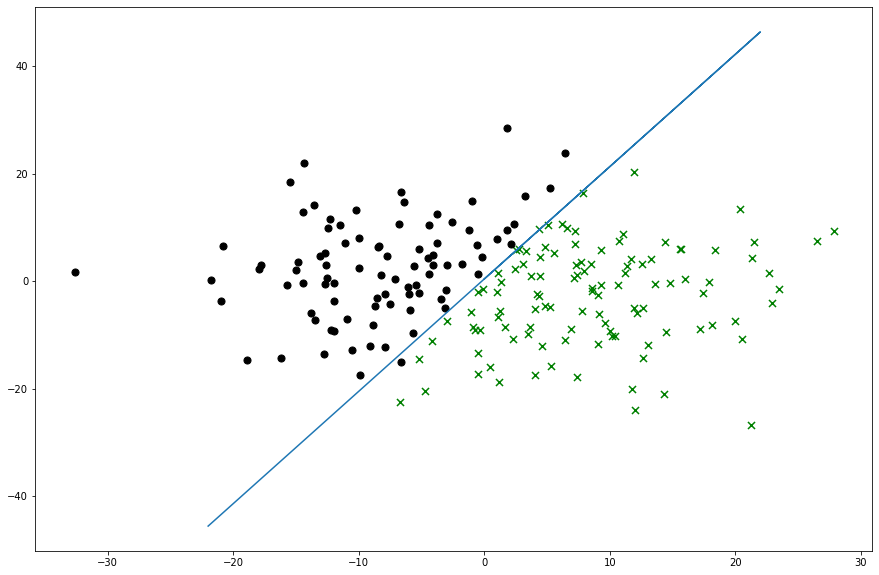

True line:[ 2 -5 -1], Estimated line: [-2.28603088  5.0822588   1.        ]
shifting point: [58] [[-11.23186698  -4.17583895   1.        ]]


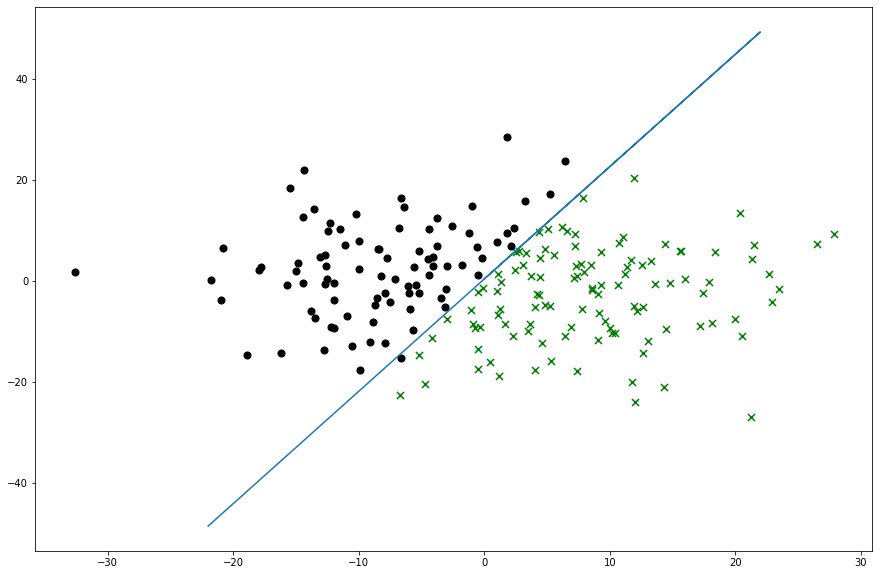

True line:[ 2 -5 -1], Estimated line: [-2.06134798  5.31812185  1.        ]
shifting point: [165] [[10.4016755   5.05995398  1.        ]]


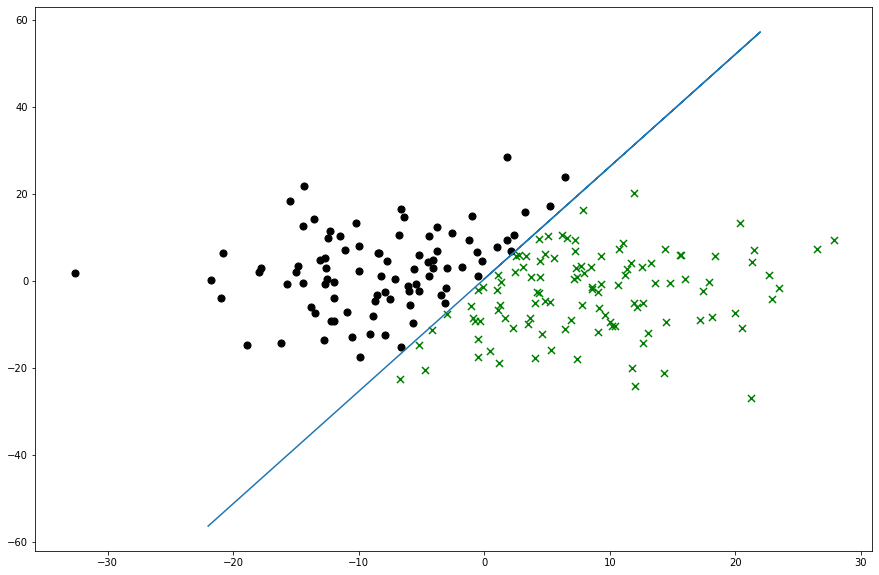

True line:[ 2 -5 -1], Estimated line: [-1.69143213  5.35461679  1.        ]
shifting point: [127] [[9.34743384 7.22788667 1.        ]]


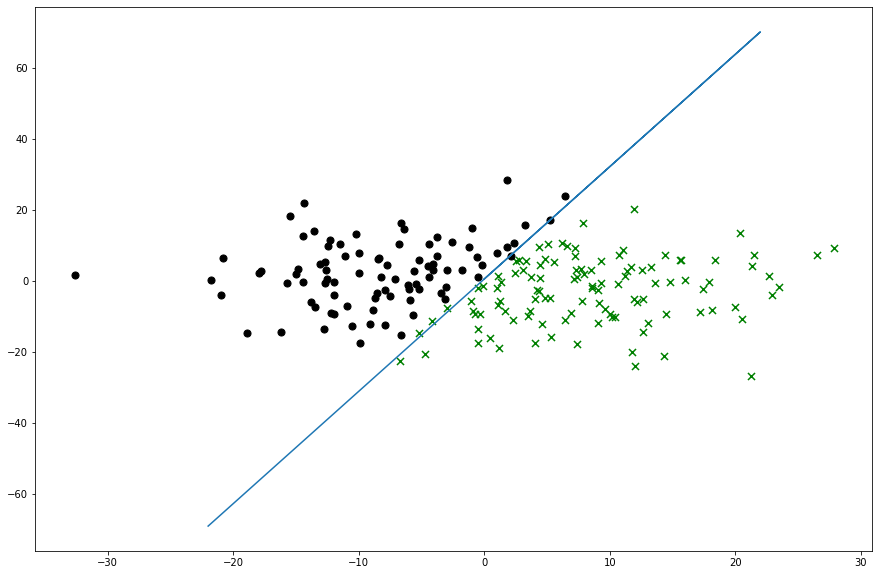

True line:[ 2 -5 -1], Estimated line: [-1.72205489  6.16255006  1.        ]
shifting point: [45] [[-5.59960393  7.75905145  1.        ]]


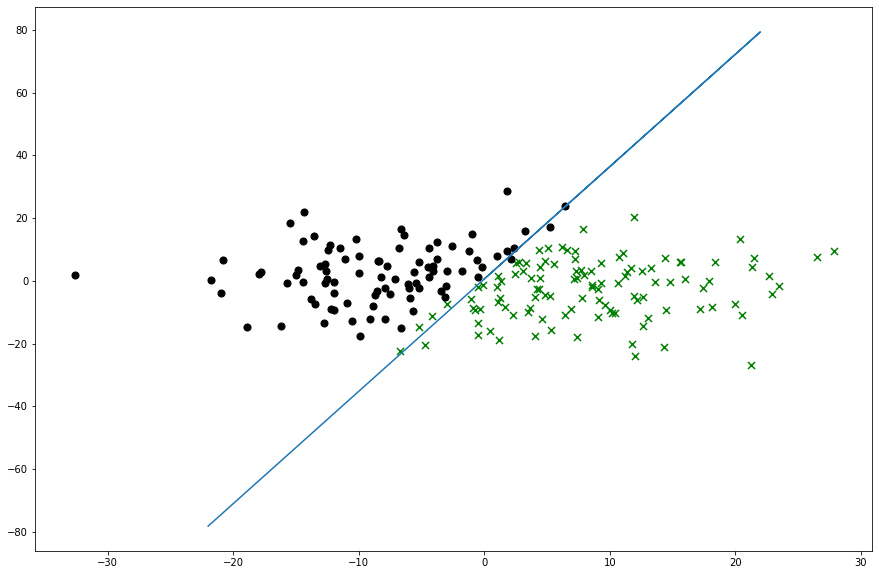

True line:[ 2 -5 -1], Estimated line: [-1.75078976  7.13232778  1.        ]
shifting point: [93] [[-9.858042    3.47792118  1.        ]]


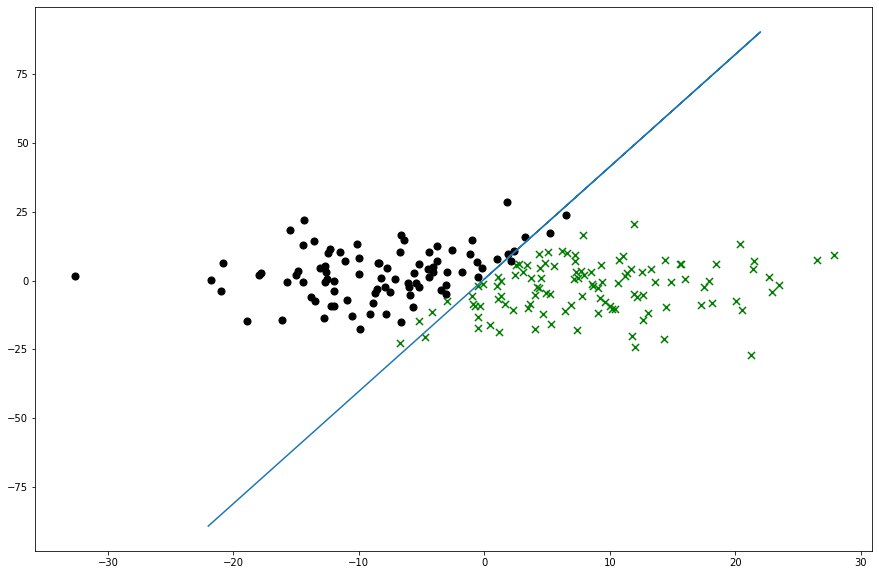

True line:[ 2 -5 -1], Estimated line: [-2.51207281  7.5490879   1.        ]
shifting point: [13] [[-0.35810697 14.83166333  1.        ]]


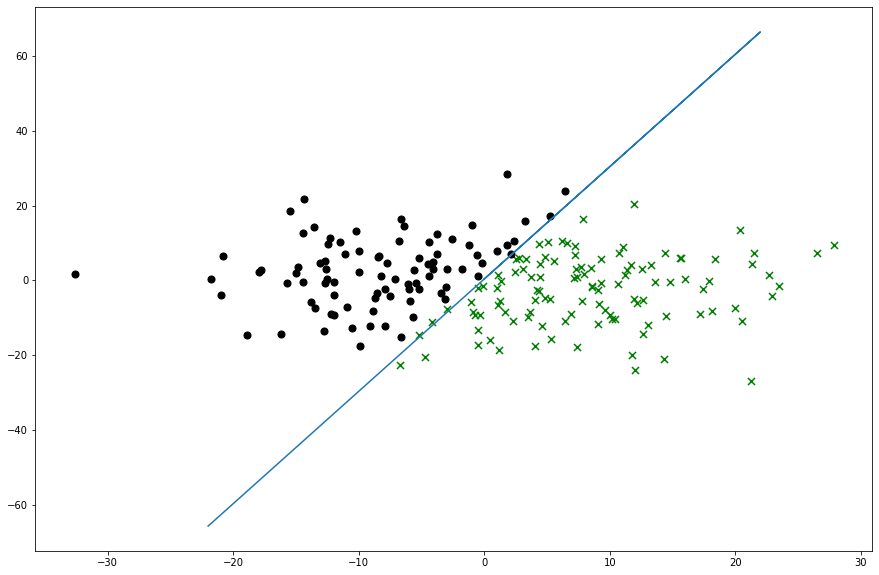

True line:[ 2 -5 -1], Estimated line: [-2.00971861  8.5151017   1.        ]
shifting point: [64] [[-26.87160653  21.23911529   1.        ]]


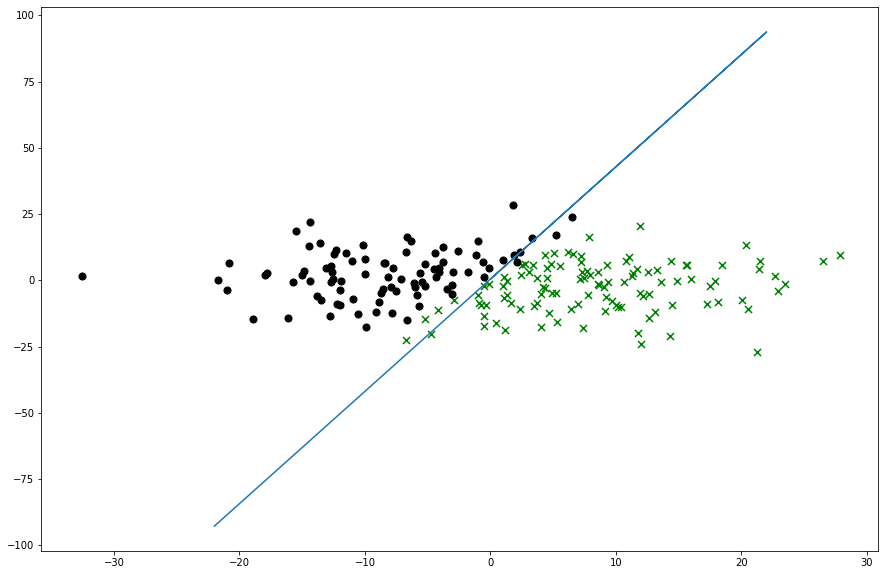

True line:[ 2 -5 -1], Estimated line: [-1.93313494  9.17144746  1.        ]
shifting point: [163] [[ 4.36900251 21.36987749  1.        ]]


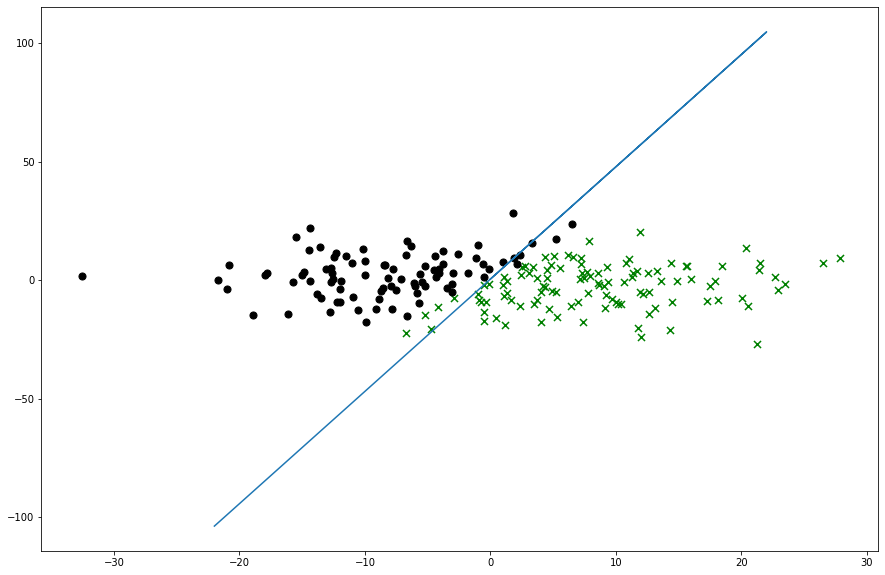

True line:[ 2 -5 -1], Estimated line: [-2.06917504  9.89433662  1.        ]
shifting point: [152] [[-10.90440854   6.45106813   1.        ]]


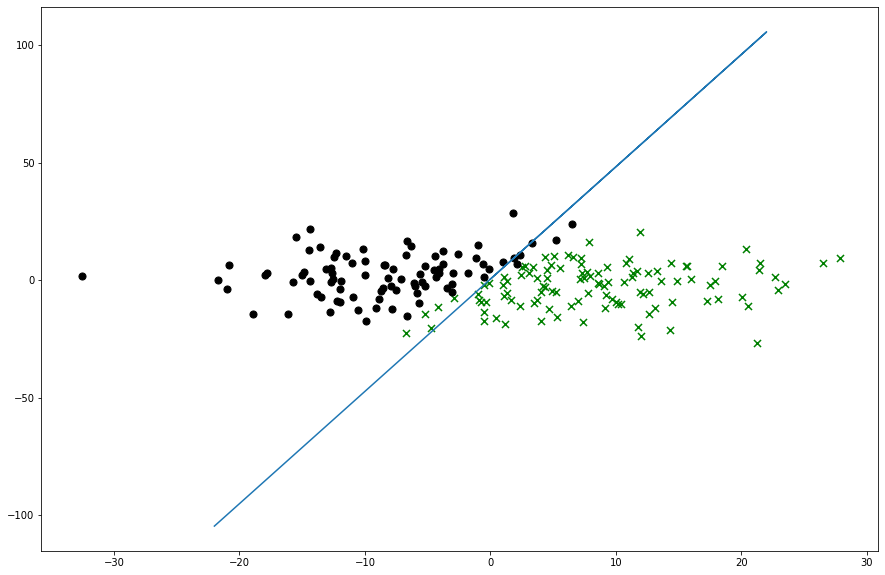

True line:[ 2 -5 -1], Estimated line: [-2.24344844  9.7914952   1.        ]
shifting point: [17] [[ -9.06513168 -12.20472457   1.        ]]


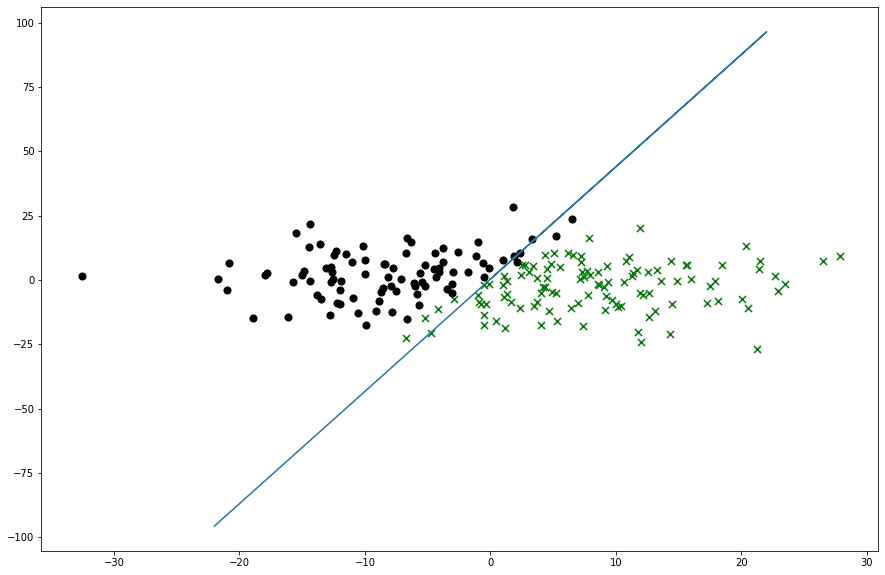

True line:[ 2 -5 -1], Estimated line: [-2.38109996 10.21789917  1.        ]
shifting point: [157] [[5.67264359 3.36284617 1.        ]]


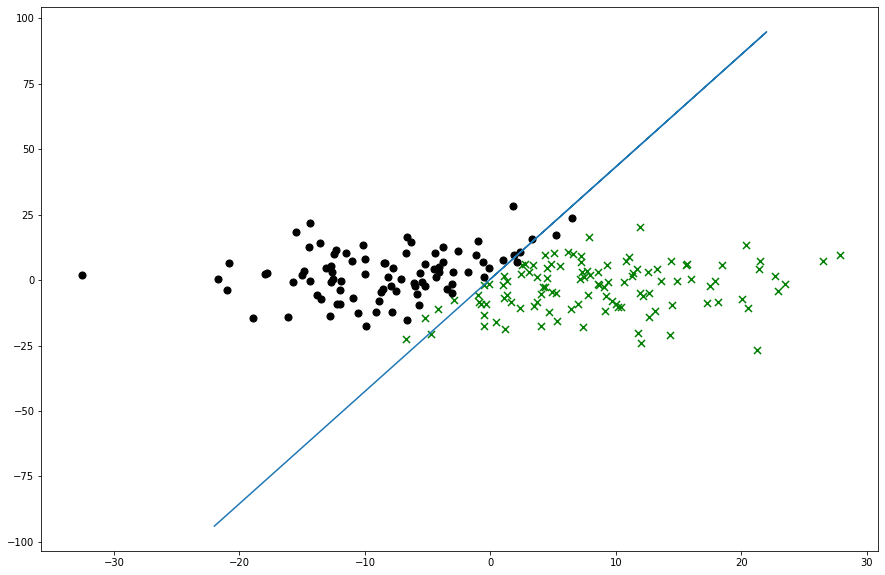

True line:[ 2 -5 -1], Estimated line: [-2.95399418 10.27949556  1.        ]
shifting point: [179] [[14.88069505 -1.01298225  1.        ]]


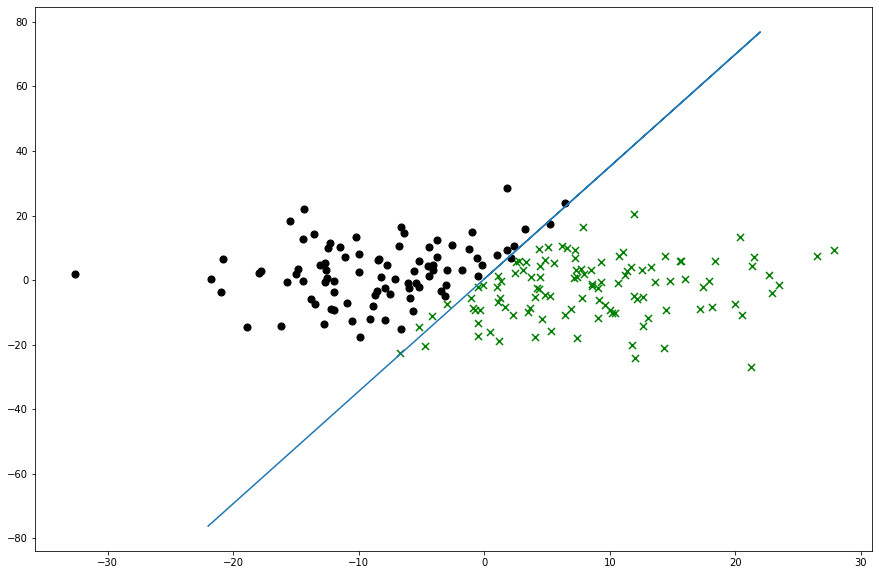

True line:[ 2 -5 -1], Estimated line: [-2.51001931 10.5200023   1.        ]
shifting point: [105] [[ 9.40385537 27.87706546  1.        ]]


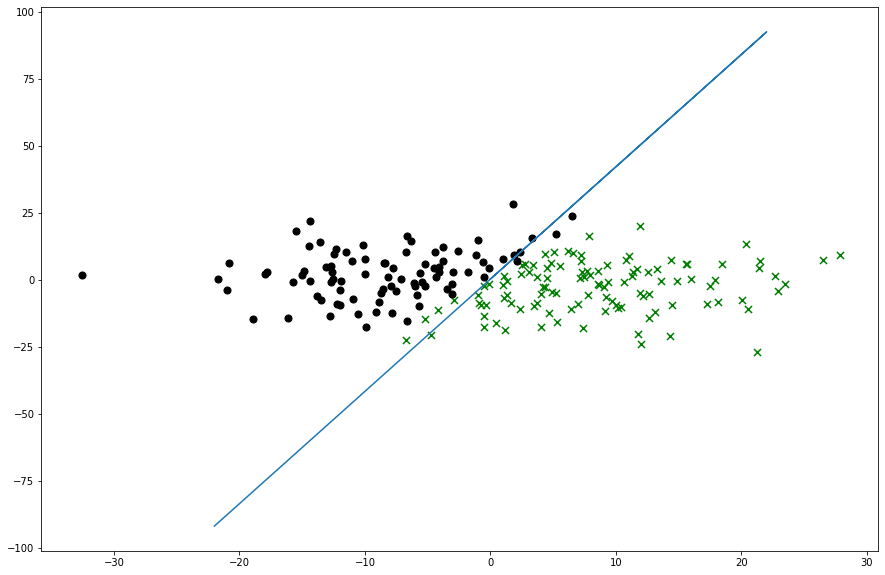

True line:[ 2 -5 -1], Estimated line: [-2.74430438 10.14621746  1.        ]
shifting point: [160] [[ 4.08073738 13.30491351  1.        ]]


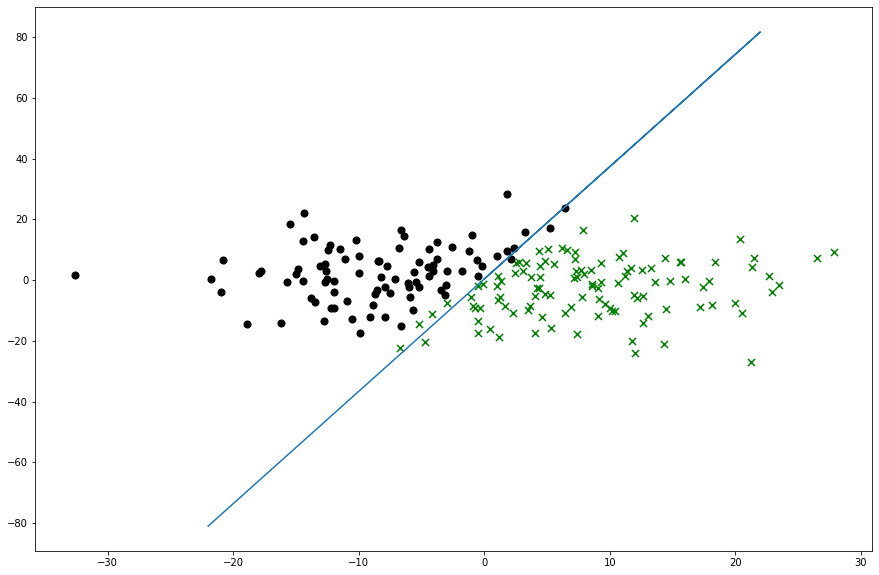

True line:[ 2 -5 -1], Estimated line: [-1.42265563 10.97295045  1.        ]
shifting point: [111] [[ 6.45369724 -8.42446473  1.        ]]


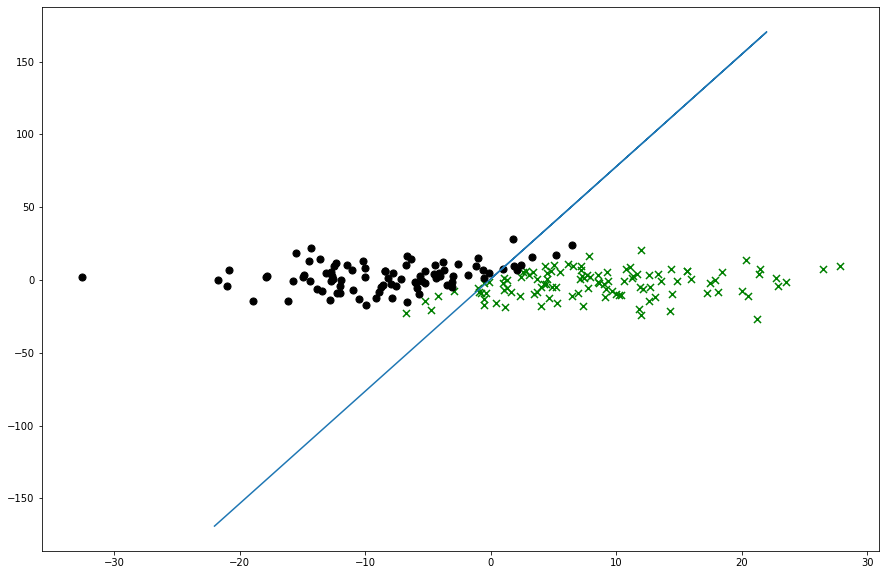

True line:[ 2 -5 -1], Estimated line: [-1.98122715 11.92261534  1.        ]
shifting point: [61] [[-2.73954769  4.38114696  1.        ]]


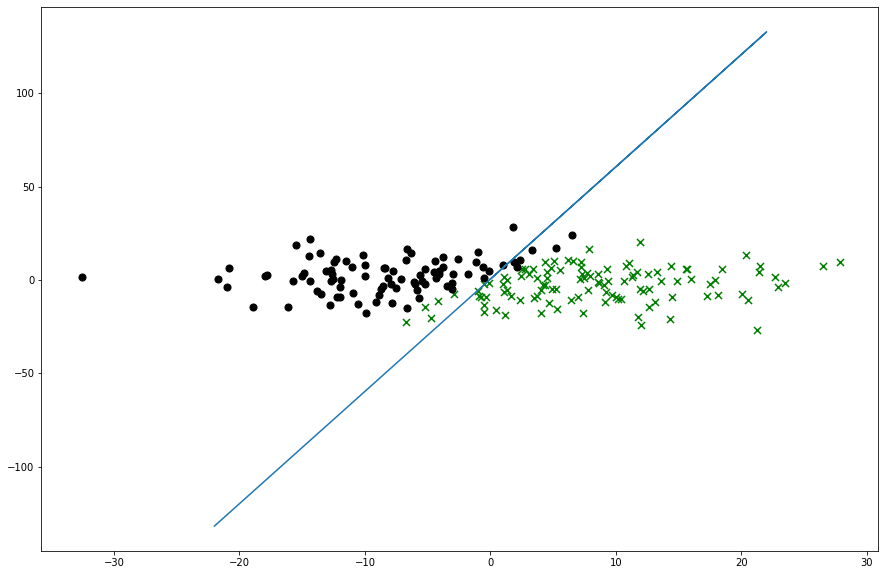

True line:[ 2 -5 -1], Estimated line: [-2.32816164 12.74675282  1.        ]
shifting point: [156] [[4.5147282  4.46454156 1.        ]]


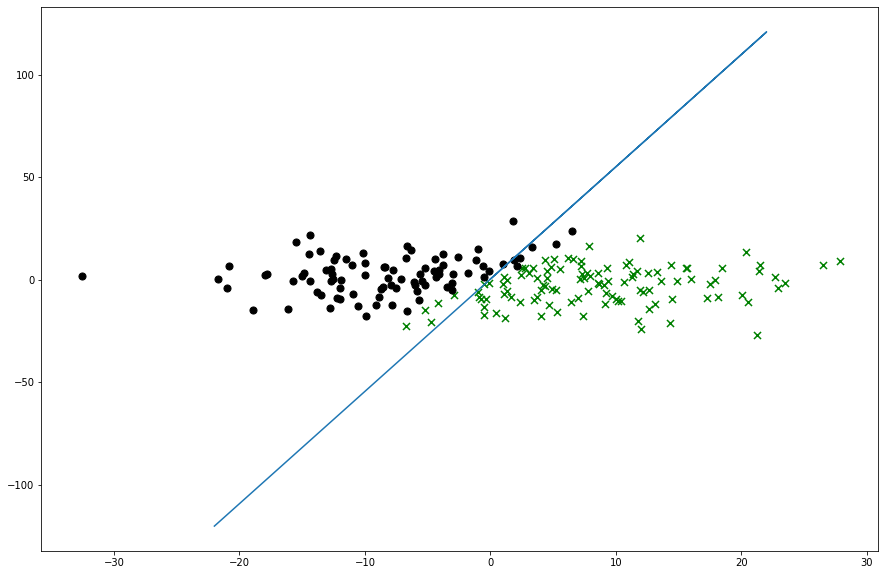

True line:[ 2 -5 -1], Estimated line: [-2.03033028 12.44981197  1.        ]
shifting point: [135] [[-10.23196611  10.39554233   1.        ]]


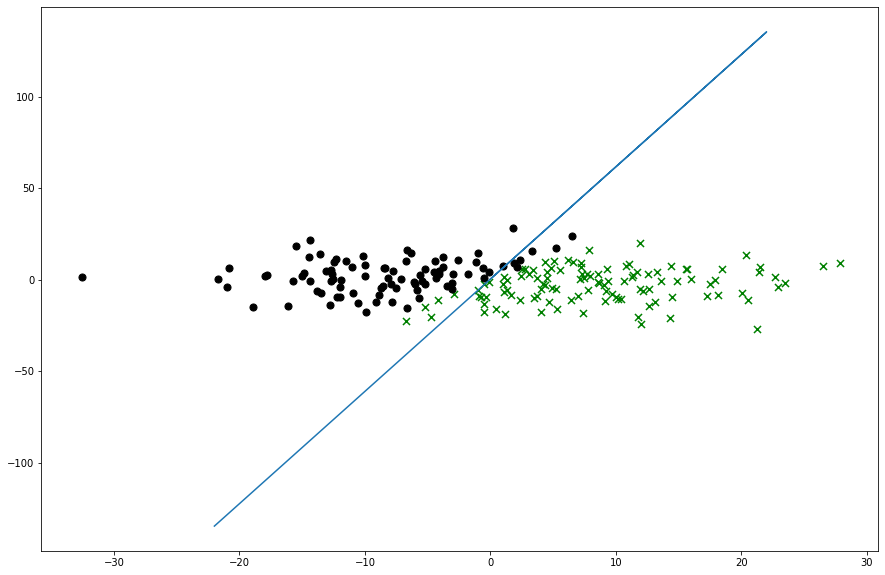

True line:[ 2 -5 -1], Estimated line: [-1.78408049 12.89409055  1.        ]
shifting point: [113] [[ 7.35435911 14.38357083  1.        ]]


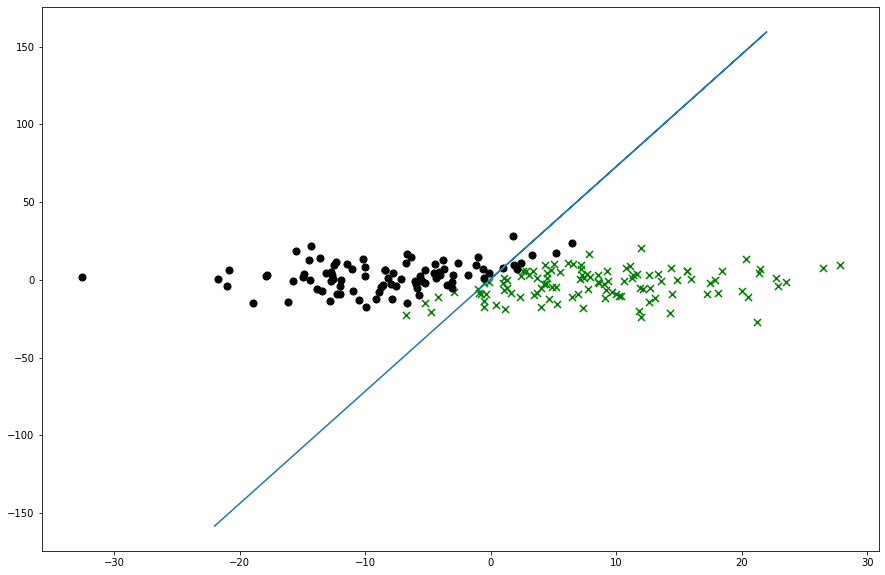

True line:[ 2 -5 -1], Estimated line: [-1.93947457 14.36532832  1.        ]
shifting point: [188] [[13.42026361 20.35796911  1.        ]]


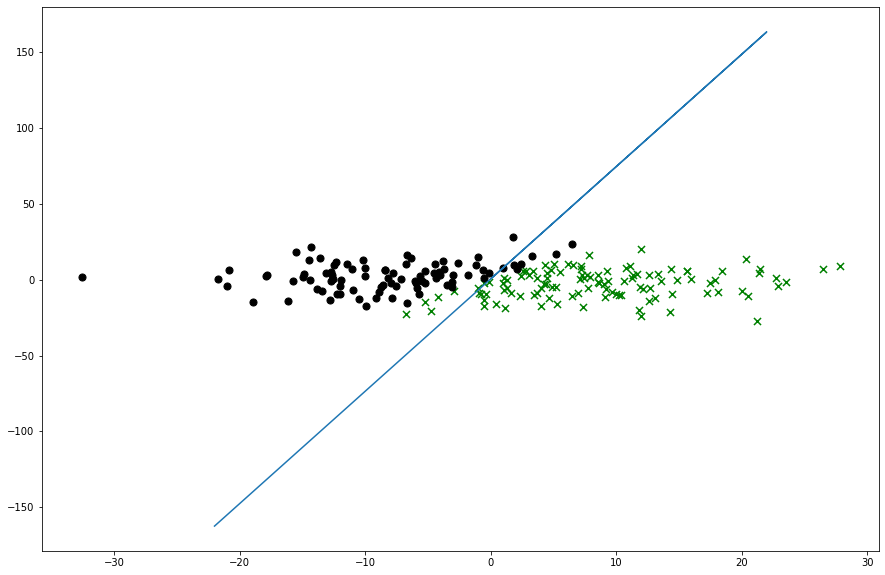

True line:[ 2 -5 -1], Estimated line: [-2.33031279 14.42652472  1.        ]
shifting point: [153] [[ 13.250599   -10.18822875   1.        ]]


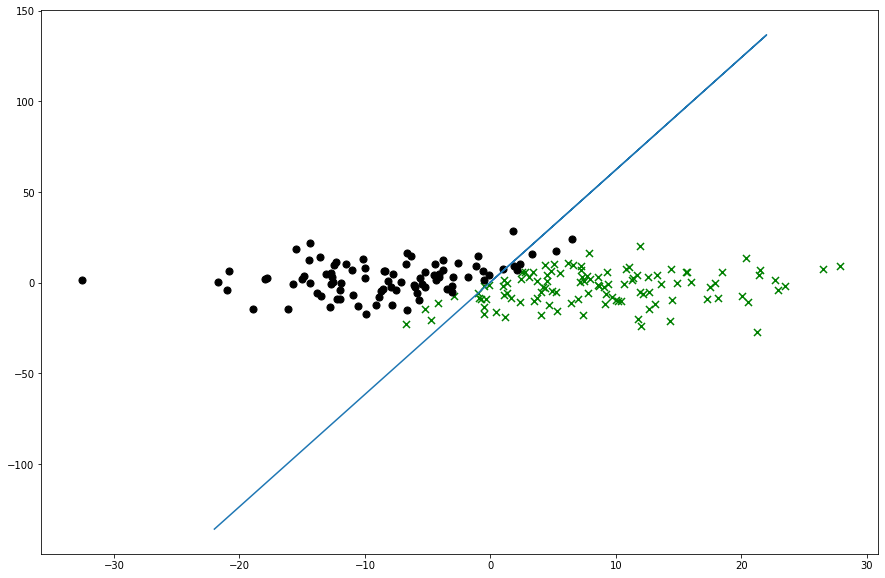

True line:[ 2 -5 -1], Estimated line: [-1.94552119 14.58367432  1.        ]
shifting point: [188] [[13.42026361 20.35796911  1.        ]]


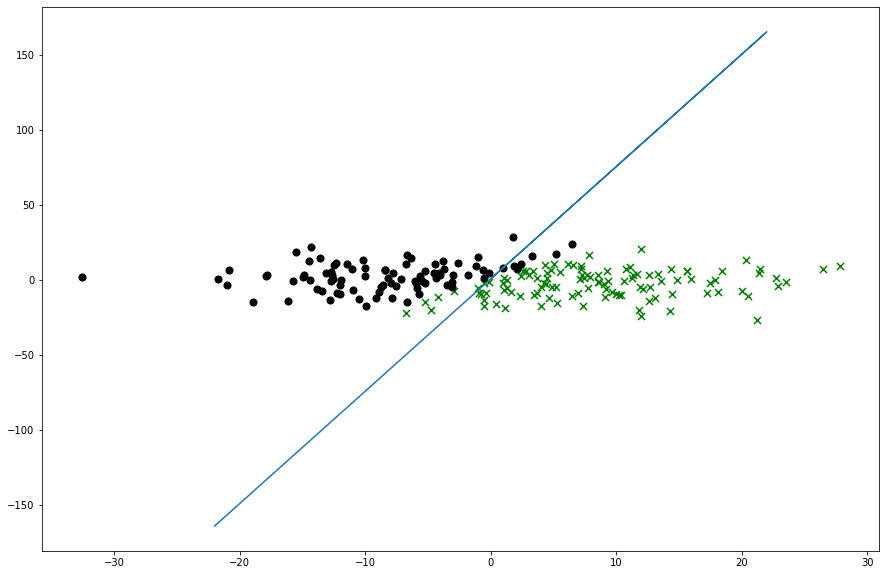

True line:[ 2 -5 -1], Estimated line: [-0.23328091 15.86817884  1.        ]
shifting point: [159] [[-1.82027506  8.62073402  1.        ]]


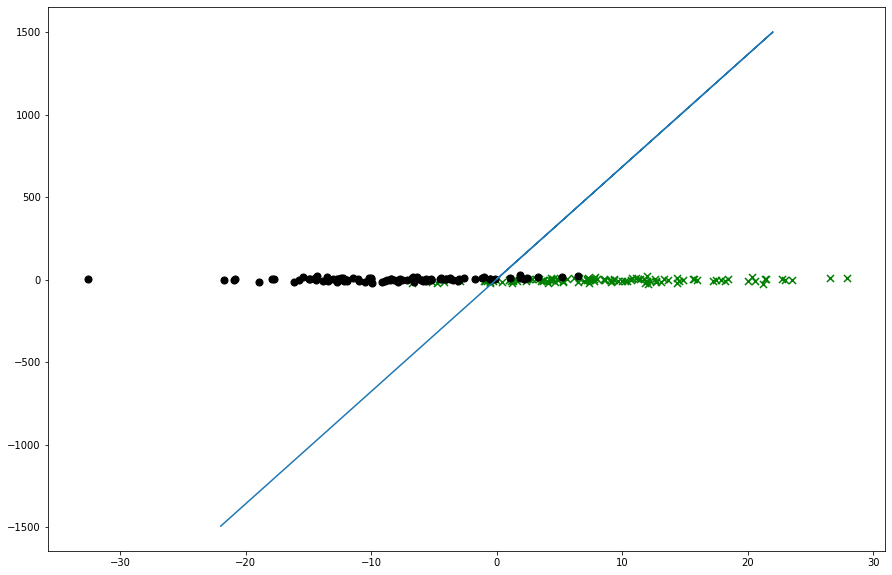

True line:[ 2 -5 -1], Estimated line: [-0.41337784 15.1268073   1.        ]
shifting point: [23] [[3.07222613 7.31770999 1.        ]]


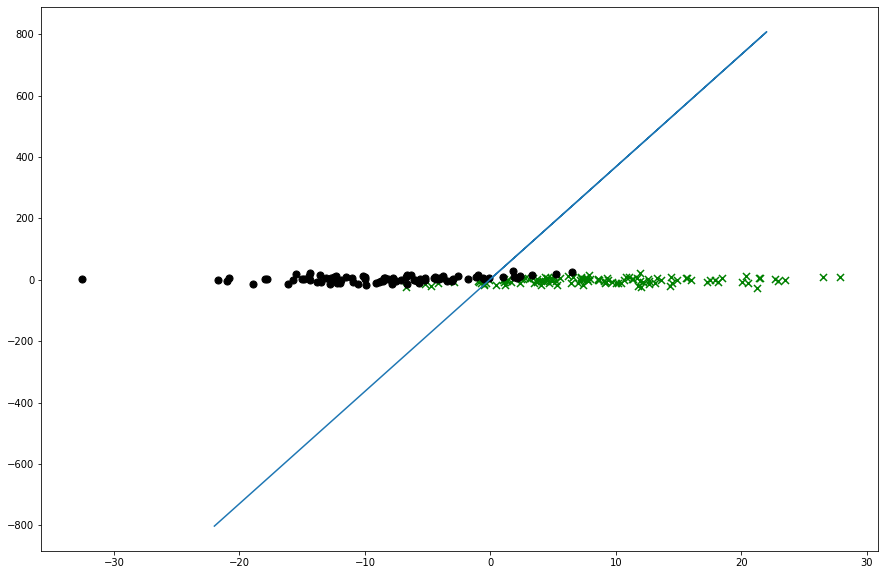

True line:[ 2 -5 -1], Estimated line: [ 0.73023784 16.06050513  1.        ]
shifting point: [165] [[10.4016755   5.05995398  1.        ]]


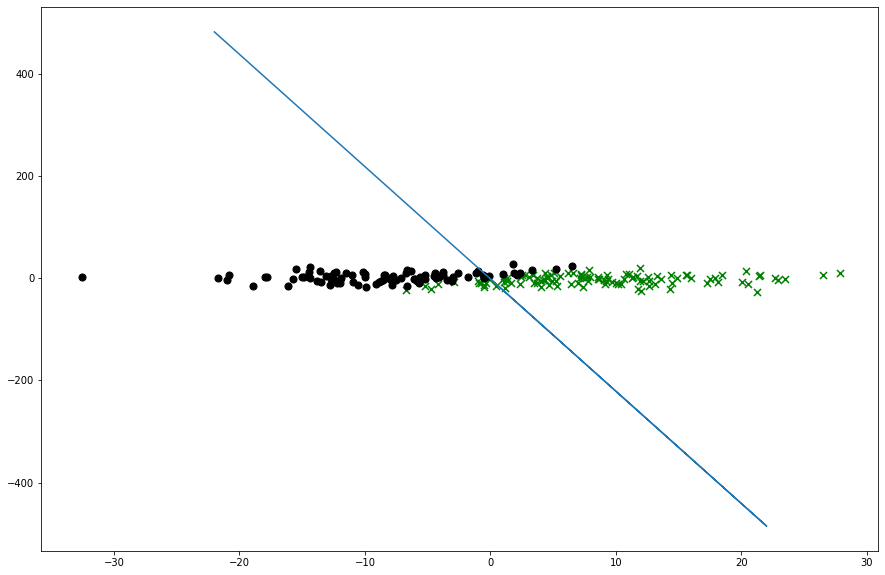

True line:[ 2 -5 -1], Estimated line: [ 0.85786255 16.31933108  1.        ]
shifting point: [60] [[-2.00806788  0.990345    1.        ]]


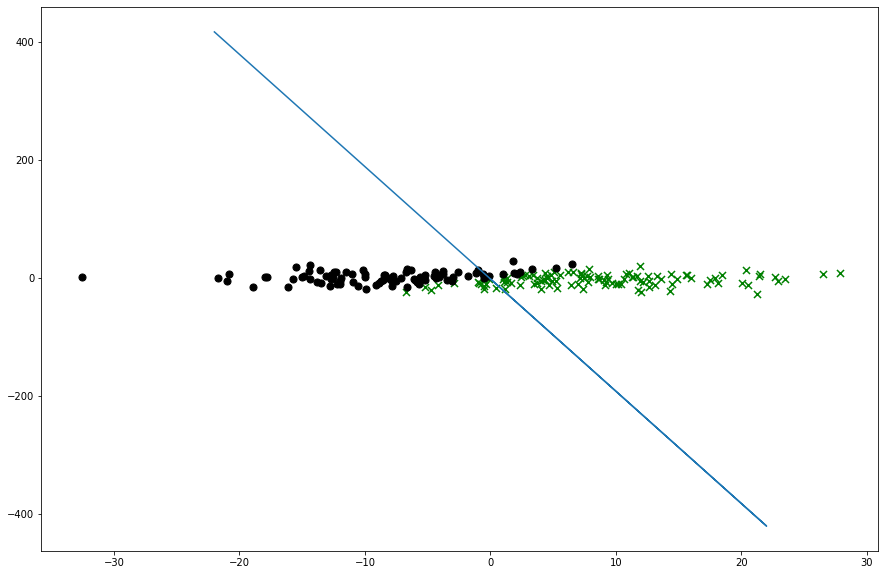

True line:[ 2 -5 -1], Estimated line: [ 0.92644943 16.7395867   1.        ]
shifting point: [83] [[ 18.45970224 -15.47180763   1.        ]]


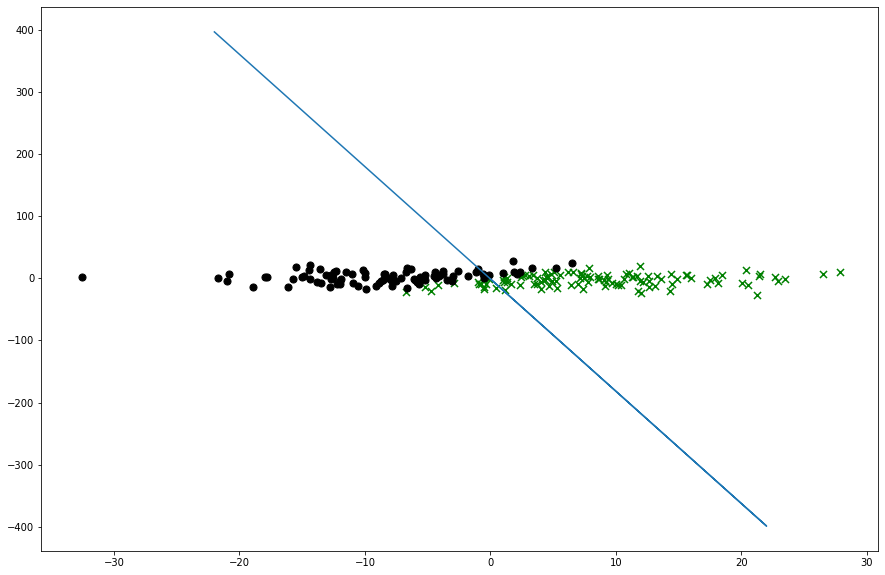

True line:[ 2 -5 -1], Estimated line: [ 0.7261291  16.99544272  1.        ]
shifting point: [153] [[ 13.250599   -10.18822875   1.        ]]


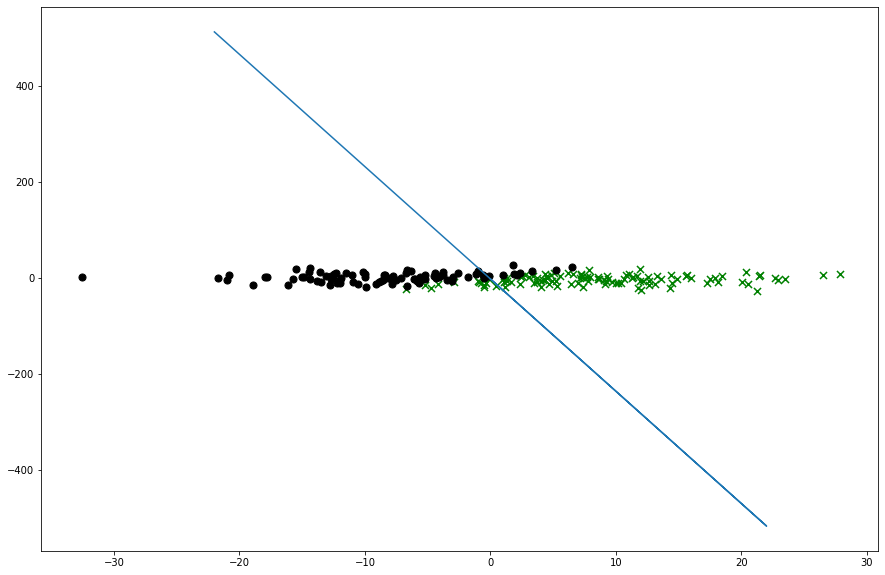

True line:[ 2 -5 -1], Estimated line: [ 0.80184382 17.36116096  1.        ]
shifting point: [85] [[ 3.04451986 -4.07267259  1.        ]]


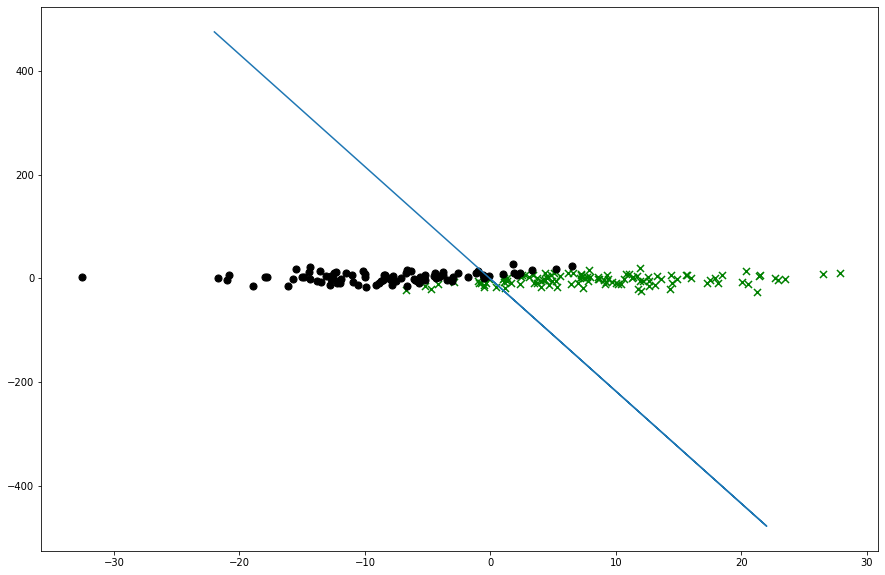

In [419]:
l = percept.fit(data, target)